# HW3 Support Vector Machine and Decision Trees

# Due on 11/30 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

In [4]:
#import the model from sklearn import svm, create the SVC object 
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#model = svm.SVC()
model = svm.SVC(kernel='linear')

#Call Train test split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('had_affair',axis=1), 
                                                    df['had_affair'], test_size=0.2, 
                                                    random_state=0)

#print out model performance
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

accuracy score:  0.7472527472527473


### Question 2. Now try different value of C-parameter and rerun your model

In [5]:
# Try C = 2**-5 and 2**5
model = svm.SVC(kernel='linear', C=2**-5)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       885
           1       0.69      0.32      0.43       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.74      0.75      0.71      1274

accuracy score:  0.7480376766091051


In [6]:
model = svm.SVC(kernel='linear', C=2**5)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

accuracy score:  0.7472527472527473


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [7]:
# Try kernel = 'rbf' and gamma = 2**-5
model = svm.SVC(kernel='rbf', gamma=2**-5)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.31      0.42       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

accuracy score:  0.7401883830455259


In [8]:
# Try kernel = 'rbf' and gamma = 0.1
model = svm.SVC(kernel='rbf', gamma=0.1)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       885
           1       0.60      0.31      0.41       389

    accuracy                           0.73      1274
   macro avg       0.68      0.61      0.62      1274
weighted avg       0.71      0.73      0.70      1274

accuracy score:  0.7276295133437991


In [9]:
# Try kernel = 'rbf' and gamma = 1
model = svm.SVC(kernel='rbf', gamma=1)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       885
           1       0.48      0.25      0.33       389

    accuracy                           0.69      1274
   macro avg       0.61      0.57      0.57      1274
weighted avg       0.65      0.69      0.66      1274

accuracy score:  0.6891679748822606


In [10]:
# Try kernel = 'rbf' and gamma = 2
model = svm.SVC(kernel='rbf', gamma=2)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       885
           1       0.38      0.15      0.21       389

    accuracy                           0.67      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.60      0.67      0.61      1274

accuracy score:  0.6656200941915228


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

**Answer:** The highest f1-score out of all the models I tried is model = svm.SVC(kernel='linear', C=2^5)

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       885
           1       0.44      0.34      0.39       389

    accuracy                           0.66      1274
   macro avg       0.59      0.58      0.58      1274
weighted avg       0.65      0.66      0.65      1274

0.6648351648351648


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [12]:
model = DecisionTreeClassifier(criterion='gini', max_depth=2)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [13]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.29      0.40       389

    accuracy                           0.74      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.72      0.74      0.70      1274

0.7362637362637363


In [14]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7394034536891679


In [15]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [16]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.29      0.40       389

    accuracy                           0.74      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.72      0.74      0.70      1274

0.7362637362637363


In [17]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7394034536891679


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

**Answer:** The criterion is not important in this case. The change max_depth only made slight differences in precision, recall, f1-score, and accuracy score. The best choice for max_depth is max_depth=2 and the criterion can equal either 'gini' or 'entropy'

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [18]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [19]:
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [20]:
# from IPython.display import Image  
# from sklearn.externals.six import StringIO  
# from sklearn.tree import export_graphviz
# import io
# import pydot 

# Pick up all featurs columns from your data frame
# features = list(df.drop(['had_affair'],axis=1).columns)
# features

In [21]:
# dot_data = StringIO()  
# export_graphviz(model, out_file=dot_data, feature_names=features)
# (graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

In [22]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees

In [23]:
from sklearn import tree
model1 = DecisionTreeClassifier(criterion='gini', max_depth=2)
model1.fit(X_train, Y_train)
model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(X_train, Y_train)
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model3.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 181.2, 'X[0] <= 3.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(83.7, 108.72, 'X[2] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(41.85, 36.23999999999998, 'gini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 4.25\ngini = 0.376\nsamples = 3929\nvalue = [2942, 987]'),
 Text(209.25, 36.23999999999998, 'gini = 0.245\nsamples = 1609\nvalue = [1379, 230]'),
 Text(292.95, 36.23999999999998, 'gini = 0.44\nsamples = 2320\nvalue = [1563, 757]')]

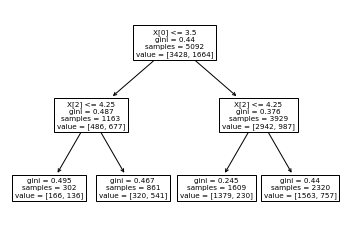

In [25]:
tree.plot_tree(model1)

[Text(167.4, 190.26, 'X[0] <= 3.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(83.7, 135.9, 'X[2] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 1.5\ngini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(20.925, 27.180000000000007, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.498\nsamples = 280\nvalue = [148, 132]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 0.5\ngini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(104.625, 27.180000000000007, 'gini = 0.453\nsamples = 726\nvalue = [252, 474]'),
 Text(146.475, 27.180000000000007, 'gini = 0.5\nsamples = 135\nvalue = [68, 67]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 4.25\ngini = 0.376\nsamples = 3929\nvalue = [2942, 987]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 4.5\ngini = 0.245\nsamples = 1609\nvalue = [1379, 230]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.32\nsamples 

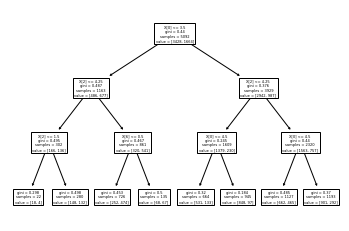

In [26]:
tree.plot_tree(model2)

[Text(167.4, 195.696, 'X[0] <= 3.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(83.7, 152.208, 'X[2] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(41.85, 108.72, 'X[2] <= 1.5\ngini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(20.925, 65.232, 'X[4] <= 1.5\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(10.4625, 21.744, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(31.387500000000003, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(62.775000000000006, 65.232, 'X[1] <= 29.5\ngini = 0.498\nsamples = 280\nvalue = [148, 132]'),
 Text(52.3125, 21.744, 'gini = 0.5\nsamples = 267\nvalue = [137, 130]'),
 Text(73.2375, 21.744, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(125.55000000000001, 108.72, 'X[6] <= 0.5\ngini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(104.625, 65.232, 'X[4] <= 2.5\ngini = 0.453\nsamples = 726\nvalue = [252, 474]'),
 Text(94.16250000000001, 21.744, 'gini = 0.424\nsamples = 410\nvalue = [125

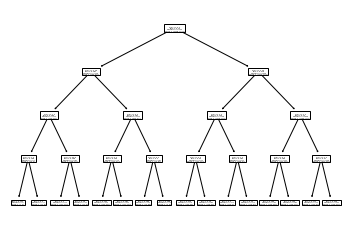

In [27]:
tree.plot_tree(model3) 

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred))
print(accuracy_score(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       885
           1       0.48      0.41      0.44       389

    accuracy                           0.69      1274
   macro avg       0.62      0.61      0.61      1274
weighted avg       0.67      0.69      0.68      1274

0.6868131868131868
